# Data scientist: analytics specialist path Codecademy¶

# 21.Data Scientist: Analytics Specialist Final Project: Food Ordering and Delivery 

# Objectives

Analyze data of different orders made by the registered customers in an online portal (App) of a food aggregator company to get a view how restaurants can streamline their operations and improve their customer experience.

# Introduction

Foodhub is a company that provides online food ordering services to restaurants and takeaways. The company has developed a range of software tools and platforms, that are designed to help restaurants manage their day-to-day activities, such as taking orders, tracking inventory, and analyzing sales data. These tools are easy to use and provide valuable insights that can help restaurants make informed decisions about their operations[REF1]. Briefly, the food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app. The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, the pick-up does confirm in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app [REF2]. Analyze data of different orders made by the registered customers in the online portal (App) of the food aggregator company allow to get a view how these restaurants can streamline their operations and improve their customer experience.

# Methods

The dataset (food_order csv) has been available through the Kaggle website [REF2] and it has been selected based on several criteria provided by the Codecademy platform (e.g. Is a reliable dataset? Does the dataset cointain detailed data dictionary of each variable? Does the dataset allow to perform a specific analysis?). Before to perform the data visualisation, inspection of the dataframe has been performed in order to get a view of the descriptive statistics and further to clean up mistakes due to wrong spelling in the variables or missing values. The food_order csv file contains different data related to the Foodhub company and a detailed data dictionary of each enclosed variable. Data analysis has been performed using the Exploratory Data Analysis (EDA) approach that does employ a variety of techniques (mostly graphical) to maximize insight into the dataset, extract important variables and determine optimal factor settings. Data analysis was performed using Python 3 software. The Python script is reported below.

# Results

The original dataframe does contain 1898 observations and 9 variables (restaurant_name, cuisine_type , day_of_the_week and rating, order_id, customer_id, food_preparation_time, delivery_time and cost_of_the_order). After clean up mistakes due to wrong spelling in the name restaurant variables and missing values in the rating variable, the number of the order ids is 1868, there are 1183 unique customers, the "updated" number of restaurants is 147 (instead of 178), the categories of the rating variable are 3 (3, 4, 5, repsectively). Besides, in the dataframe are present 14 categories for the cuisine variable (American, Chinese, French, Indian, Italian, Japanese, Korean, Mediterranean, Mexican, Middle Eastern, Southern, Spanish, Thai and Vietnamese) and the presence of 2 categories for the day of week in which the order is placed (Weekday and Weekend). Data analysis using the EDA approach shows that the American cuisine show the highest percentages of orders by the customers (31,0%), followed by the Japanes, the Italian and Chinese cuisines (25,1%, 15.2% and 11.4% respectively). On the other side, the Spanish, the Korean and Vietmanese cuisine seem to have the lowest number of orders by the customrs (0.6%, 0.6% and 0.4%, respectively). Besides, the food orders are mainly made by the customers in the weekend than during the other days of the week (70,9%, 29.1%, respectively). 
The mean of the price, the preparation time and delivery of the food for the most four popular categories of cuisines (American, Japanes, the Italian and Chinese) do not seem to different to much, neverless the percentages of food orders withing these categories is different. No relavant correlation between the price of the food and both the food preparation and time delivery. 

# Conclusions

The results have been confirmed the success of the vision of the company to automate and bring software to help restaurants run more efficiently. The results of the analysis seem to confirm that by using technology, restaurants can streamline their operations and improve their customer experience. However, some limitations and further investigation in gain more data is required in order to get available data related to a more long time period, pointed out also difference in time trends between years and seasons. Further research could be adress to overcome the limitations and results of this analysis

# Python script¶

DATA ACQUISITION

Before to upload the csv file, the Python libraries used in the further analysis have been imported.

In [1]:
#Upload the Python libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

Load the food_order data (CSV file) from the Kaggle platform [REF2]

In [2]:
#food_order.csv > The csv file holds recorded hightings different ranking data of food delivery
dataset = pd.read_csv('food_order.csv')
dataset_obs = pd.DataFrame(dataset) #Make dataframe 

INSPECT, CLEAN AND VALIDATE THE FOOD ORDER DATAFRAME

Before to perform the data visualisation, inspection of the dataframe has been performed in order to get a view of the descriptive statistics (such as view of their enclosed variables, their size and shape etc.) and to further clean up mistakes due to wrong spelling in the variables or missing values.

In [3]:
#Food order dataframe 
print(dataset_obs.head(5)) # first items of the dataset
print(dataset_obs.columns.values) #View  of the columns (varialbes) of the dataset1 
dataset_obs.info()     #concise summary of the dataframe like the index dtype and columns, non-null values and memory usage 
dataset_obs.describe() #Simple statistics of the numnerical variables

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  
['order_id' 'customer_id' 'resta

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [4]:
size = dataset_obs.size # dataframe.size
print(size)
shape =dataset_obs.shape  # dataframe.shape
print(shape)

17082
(1898, 9)


The above outputs show that the dataframe does contain 1898 observations and its size (17082) is equivalent to its rows x columns (1898x9). Besides, the dataframe is characterised by 9 variables: 4 categorical variables (restaurant_name, cuisine_type, day_of_the_week and rating), 4 numerical varialbes (order_id, customer_id, food_preparation_time and delivery_time) and 1 float variable (cost_of_the_order). Based on [REF2], the detailed data dictionary enclosed in the dataframe does provide a short description of the each variable and it is reported below.

In [5]:
#food_order dictionary
dataframe_dictionary = {'order_id': 'Unique ID of the order', 'customer_id': 'ID of the customer who ordered the food', 'restaurant_name': 'Name of the restaurant',
                 'cuisine_type': 'Cuisine ordered by the customer', 'cost': 'Cost of the order ($)', 'day_of_the_week': 'Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)',
                 'rating': 'Rating given by the customer out of 5', 'food_preparation_time': 'Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant order confirmation and the delivery person pick-up confirmation',
                 'delivery_time': 'Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person'}
print(dataframe_dictionary)
print(type(dataframe_dictionary)) #check data type

{'order_id': 'Unique ID of the order', 'customer_id': 'ID of the customer who ordered the food', 'restaurant_name': 'Name of the restaurant', 'cuisine_type': 'Cuisine ordered by the customer', 'cost': 'Cost of the order ($)', 'day_of_the_week': 'Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)', 'rating': 'Rating given by the customer out of 5', 'food_preparation_time': 'Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant order confirmation and the delivery person pick-up confirmation', 'delivery_time': 'Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person'}
<class 'dict'>


Inspection of each CATEGORICAL VARIABLE and eventually clean up of spelling mistakes and missing values enclosed in the Dataframe.

In [6]:
# Inspection variable restaurant_name
print(" The number of the different restaurants is {}".format(dataset_obs["restaurant_name"].nunique())) 

 The number of the different restaurants is 178


In [7]:
print(dataset_obs.sort_values(by=['restaurant_name']).restaurant_name.unique())

["'wichcraft" '12 Chairs' '5 Napkin Burger' '67 Burger' 'Alidoro' 'Amma'
 "Amy Ruth's" 'Anjappar Chettinad' 'Asuka Sushi' 'Aurora' 'Balade'
 'Balthazar Boulangerie' 'Barbounia' 'Bareburger' 'Benihana'
 'Bhatti Indian Grill' "Big Daddy's" 'Big Wong Restaurant \x8c_¤¾Ñ¼'
 'Bistango' 'Blue Ribbon Brooklyn' 'Blue Ribbon Fried Chicken'
 'Blue Ribbon Sushi' 'Blue Ribbon Sushi Bar & Grill'
 'Blue Ribbon Sushi Izakaya' 'Boqueria' "Bubby's " 'Bukhara Grill'
 'Burger Joint' 'Byblos Restaurant' 'Cafe Habana' 'Cafe Mogador'
 'Cafe de La Esquina' 'Cafeteria' 'CafÌ© China' "Carmine's"
 'Chipotle Mexican Grill $1.99 Delivery' 'Cho Dang Gol'
 'Chola Eclectic Indian Cuisine' 'Chote Nawab' 'Cipriani Le Specialita'
 "Coppola's East" 'Crema Restaurante' 'Delicatessen' 'DespaÌ±a'
 "Dickson's Farmstand Meats" 'Dig Inn Seasonal Market'
 'Dirty Bird To Go (archived)' 'Dirty Bird to Go'
 "Don's Bogam BBQ & Wine Bar" 'Donburi-ya' 'Dos Caminos'
 'Dos Caminos Soho' 'DuMont Burger' 'El Parador Cafe'
 'Empanada Mam

The output shows the presence of 178 restaurants enclosed in the dataframe. However, a deep inspection of the output does show  mistake in the spelling of some name of restaurant that have been therefore renamed in the right format.

In [8]:
#Rename to delete the mistake of wrong name restaurants
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(['Big Wong Restaurant \x8c_¤¾Ñ¼'], 'Big Wong Restaurant')
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(['Dirty Bird To Go (archived)'], 'Dirty Bird to Go')
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(["Joe's Shanghai \x8e_À\x8eü£¾÷´"], "Joe's Shanghai")
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(["Sushi of Gari 46"], "Sushi of Gari")
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(["Sushi of Gari Tribeca"], "Sushi of Gari")
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(["Vanessa's Dumpling House"], "Vanessa's Dumplings")
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(["Chipotle Mexican Grill $1.99 Delivery"], "Chipotle Mexican Grill Delivery")
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(["Empanada Mama (closed)"], "Empanada Mama")
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(["Sarabeth's East"], "Sarabeth's Restaurant")
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(["Sarabeth's"], "Sarabeth's Restaurant")
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(["Sarabeth's West"], "Sarabeth's Restaurant")
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(["Blue Ribbon Sushi Bar & Grill"], "Blue Ribbon Sushi")
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(["Blue Ribbon Sushi Izakaya"], "Blue Ribbon Sushi")
dataset_obs['restaurant_name'] = dataset_obs['restaurant_name'].replace(["CafÌ© China"], "CafÌo China")

#print(dataset_obs.sort_values(by=["restaurant_name"]).restaurant_name.unique())

print(" The number of the different restaurants is {}".format(dataset_obs["restaurant_name"].nunique()))

 The number of the different restaurants is 169


After removing the mistakes in the spelling of some names of restaurants, the total number of restaurants is 169 (instead of 178).

In [9]:
# Inspection variable rating
print(" The categories of the rating variable are {}".format(dataset_obs["rating"].nunique())) 

 The categories of the rating variable are 4


In [10]:
print(dataset_obs.sort_values(by=['rating']).rating.unique())

['3' '4' '5' 'Not given']


The output shows the presence of 3 categories in the rating variable (3, 4, and 5, respectively). The rating classification is according to (REF.1) that does indicate a increased positive review (from 3 till 5) from the customer. However, the output shows also the presence of an additional category rating, "Not given". The reasons of a "Not given" rating can be different, such as for instance the customer has forgot to rating the restaurant, or the rating was related to a negative review (rating from 1 till 2).

In [11]:
print(dataset_obs['rating'].value_counts()) 
#dataset_obs["rating"].value_counts(normalize=True) * 100

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


Due to the huge number of observations in "Not given" rating category (736), it has been made the assumption to consider these values as NaN values and further to replace them with the mean of observations of each respective restaurant (assuming that the respective restaurant could have more than one observation).

In [12]:
# Create a new column rating_new that does include NaN in place of 'Not given'
dataset_obs['rating_new'] = dataset_obs['rating'].replace('Not given', np.nan).astype(float)

# Imputing Nan values with mean rating of the respective restaurant
dataset_obs['rating_new'] = dataset_obs['rating_new'].fillna(value = dataset_obs.groupby(['restaurant_name'])['rating_new'].transform('mean'))

dataset_obs.head(10)

#print(dataset_obs['rating_new'].value_counts()) 
#dataset_obs['rating_new'].value_counts(normalize=True) * 100

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_new
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi,Japanese,12.08,Weekend,Not given,25,23,4.309735
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.000000
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.000000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.000000
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,3.000000
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,4.511905
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,3.000000
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,5.000000
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,5.000000


The output shows that the values of the rating_new variable have decimals. Therefore, let's round the new rating array (values) to the nearest integer. Besides as it can been seen, there is still the presence of 30 NaN values (see below output) due to the absence of more than one observation for these restaurants. Therefore, let's make a further assumption to consider these 30 NaN values as missing values and drop them from the dataframe.

In [13]:
#Use of numpy.round() method to round the new rating values to the nearest integer.
dataset_obs['rating_newww'] = np.round(dataset_obs['rating_new'], 0) 

In [14]:
#let's convert the rating_newww from 'float' to again 'String' (object) type as it was in the original dataframe.
dataset_obs['rating_newww'] = dataset_obs['rating_newww'].astype(str) 

In [15]:
print(dataset_obs.dtypes)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
rating_new               float64
rating_newww              object
dtype: object


In [16]:
print(dataset_obs['rating_newww'].value_counts()) 

4.0    937
5.0    735
3.0    196
nan     30
Name: rating_newww, dtype: int64


In [17]:
# dropping the rows having NaN values
dataset_obs = dataset_obs.dropna()

In [18]:
print(" The categories of the rating variable are {}".format(dataset_obs["rating_newww"].nunique())) 

 The categories of the rating variable are 3


In [19]:
print(dataset_obs.sort_values(by=['rating_newww']).rating_newww.unique())

['3.0' '4.0' '5.0']


In [20]:
print(dataset_obs['rating_newww'].value_counts()) 

4.0    937
5.0    735
3.0    196
Name: rating_newww, dtype: int64


Since the number of obsrvations in the Dataframe has been changed, let's have again a look at the descriptive statistics of the dataframe (and enclosed variables).

In [21]:
print(dataset_obs.head(5)) # first items of the dataset
print(dataset_obs.columns.values) #View  of the columns (varialbes) of the dataset1 
dataset_obs.info()     #concise summary of the dataframe like the index dtype and columns, non-null values and memory usage 
dataset_obs.describe() #Simple statistics of the numnerical variables

   order_id  customer_id            restaurant_name cuisine_type  \
1   1477685       358141          Blue Ribbon Sushi     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   
5   1477224       147468           Tamarind TriBeCa       Indian   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   
5              25.22         Weekday          3                     20   

   delivery_time  rating_new rating_newww  
1             23    4.309735          4.0  
2             28    5.000000          5.0  
3             

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,rating_new
count,1.868000e+03,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,1.477495e+06,170801.970021,16.512195,27.361349,24.185225,4.347652
std,5.489092e+02,113536.338875,7.473723,4.628866,4.960147,0.608600
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,3.000000
25%,1.477020e+06,77544.000000,12.080000,23.000000,20.000000,4.000000
50%,1.477492e+06,128476.500000,14.160000,27.000000,25.000000,4.309735
75%,1.477973e+06,270444.000000,22.272500,31.000000,28.000000,5.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,5.000000


In [22]:
size = dataset_obs.size # dataframe.size
print(size)
shape =dataset_obs.shape  # dataframe.shape
print(shape)

# Ri- Inspection variable restaurant_name
print(" The number of the different restaurants is {}".format(dataset_obs["restaurant_name"].nunique())) 

# Ri Inspection variable rating
print(" The categories of the rating variable are {}".format(dataset_obs["rating_newww"].nunique())) 

20548
(1868, 11)
 The number of the different restaurants is 147
 The categories of the rating variable are 3


To sum up, after clean up mistakes due to wrong spelling in the name of some restaurant and missing values in the rating variable, the output does show that the total number of observations has been changed from 1898 to 1868 observations, the size of the dataframe has been increase from 20548 to 17082, the "updated" number of restaurants is 147 and the categories of the rating variables are 3.

In [23]:
# Inspection variable cuisine_type
print(" The number of the different type of cuisines is {}".format(dataset_obs["cuisine_type"].nunique())) 

 The number of the different type of cuisines is 14


In [24]:
print(dataset_obs.sort_values(by=['cuisine_type']).cuisine_type.unique())

['American' 'Chinese' 'French' 'Indian' 'Italian' 'Japanese' 'Korean'
 'Mediterranean' 'Mexican' 'Middle Eastern' 'Southern' 'Spanish' 'Thai'
 'Vietnamese']


The output does show the presence of 14 categories for the cuisine variable (American, Chinese, French, Indian, Italian, Japanese, Korean, Mediterranean, Mexican, Middle Eastern, Southern, Spanish, Thai and Vietnamese). Beside, a deep inspection of the output does not show anomalies in the categories of this variable.

In [25]:
# Inspection variable day_of_the_week
print(" The number of the categories of day of week is {}".format(dataset_obs["day_of_the_week"].nunique())) 

 The number of the categories of day of week is 2


In [26]:
print(dataset_obs.sort_values(by=['day_of_the_week']).day_of_the_week.unique())

['Weekday' 'Weekend']


The output does show the presence of 2 categories for the day of week variable in which the order is placed (Weekday and Weekend). Beside, a deep inspection of the output does not show anomalies in the categories of this variable.

VISUALISAZION OF EACH CATEGORICAL VARIABLE / UNIVARIATE ANALYSIS 

Type of cuisine

In [27]:
#variable cuisine_type
print(dataset_obs.sort_values(by=['cuisine_type']).cuisine_type.unique())

['American' 'Chinese' 'French' 'Indian' 'Italian' 'Japanese' 'Korean'
 'Mediterranean' 'Mexican' 'Middle Eastern' 'Southern' 'Spanish' 'Thai'
 'Vietnamese']


In [28]:
dataset_obs.sort_values(by=['cuisine_type']).groupby("cuisine_type").size() #The number of obs for each category of type cuisine
#dataset_obs["cuisine_type"].value_counts(normalize=True) * 100

cuisine_type
American          579
Chinese           213
French             18
Indian             73
Italian           284
Japanese          469
Korean             11
Mediterranean      46
Mexican            76
Middle Eastern     49
Southern           17
Spanish            12
Thai               14
Vietnamese          7
dtype: int64

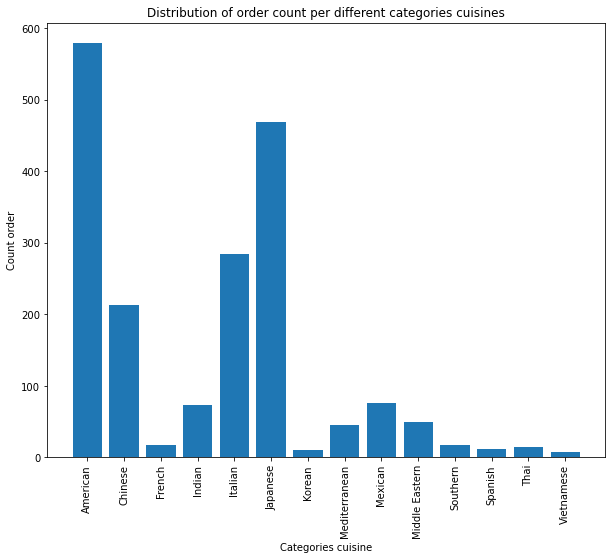

<Figure size 432x288 with 0 Axes>

In [29]:
#Barplot of the countcategory cuisine_type variable 
plt.figure(figsize=(10,8))
name_cuisine = ['American', 'Chinese', 'French', 'Indian', 'Italian', 'Japanese', 'Korean', 'Mediterranean', 'Mexican',
                'Middle Eastern', 'Southern', 'Spanish', 'Thai', 'Vietnamese']

num_obs_cuisine = [579, 213, 18, 73, 284, 469, 11, 46, 76, 49, 17, 12, 14, 7] 

plt.bar(range(len(name_cuisine)), num_obs_cuisine) # Make the bars plot 

# Add title and label to  the x and y-axis 
plt.xticks(rotation=90)
plt.title('Distribution of order count per different categories cuisines')
plt.xlabel('Categories cuisine')
plt.ylabel('Count order')
ax = plt.subplot()
ax.set_xticks(range(14))
ax.set_xticklabels(name_cuisine)

plt.savefig('Fig1.png') #Save the plot in png format 
plt.show()
plt.clf()

The plot does diplay that the American cuisine show the highest percentages of orders by the customers (31,0%), followed by the Japanes, the Italian and Chinese cuisines (25,1%, 15.2% and 11.4% respectively). On the other side, the Spanish, the Korean and Vietmanese cuisine seem to have the lowest number of orders by the customrs (0.6%, 0.6% and 0.4%, respectively). 

Day of week 

In [30]:
print(dataset_obs.sort_values(by=['day_of_the_week']).day_of_the_week.unique())

['Weekday' 'Weekend']


In [31]:
#print(dataset_obs["day_of_the_week"].value_counts()) 
dataset_obs["day_of_the_week"].value_counts(normalize=True) * 100  #The % of obs for each category of day of week

Weekend    70.931478
Weekday    29.068522
Name: day_of_the_week, dtype: float64

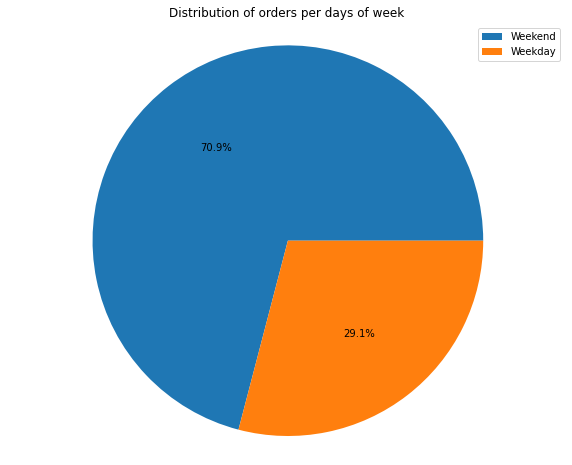

<Figure size 432x288 with 0 Axes>

In [32]:
#Display plot of the distribution of orders per different days of week  
plt.figure(figsize=(10,8))
species_category_week = ['Weekend', 'Weekday']
species_category_freqs = [70.93, 29.07]
# Make the pie chart 
plt.pie(species_category_freqs, autopct = '%0.1f%%')  #Enclose the percentange to each slice 
plt.axis('equal')
plt.legend(species_category_week, loc=0) # Enclose a legend to the plot 
plt.title('Distribution of orders per days of week') 
plt.savefig('Fig2.png')  #Save the plot in png format 
plt.show()
plt.clf()

The plot does diplay that the food orders are mainly made by the customers in the weekend than during the other days of the week (70,9%, 29.1%, respectively). 

Rating

In [33]:
print(dataset_obs.sort_values(by=['rating_newww']).rating_newww.unique())

['3.0' '4.0' '5.0']


In [ ]:
#dataset_obs["rating_newww"].value_counts(normalize=True) * 100

In [34]:
dataset_obs.sort_values(by=['rating_newww']).groupby("rating_newww").size()

rating_newww
3.0    196
4.0    937
5.0    735
dtype: int64

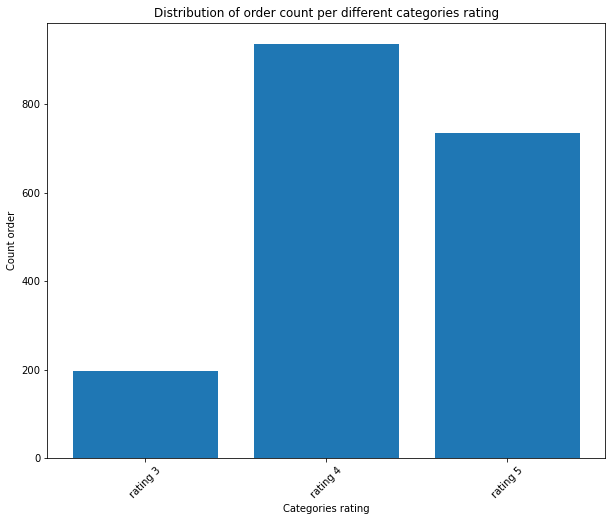

<Figure size 432x288 with 0 Axes>

In [35]:
#Barplot of the countcategory in the rating variable 
plt.figure(figsize=(10,8))
name_rating = ['rating 3', 'rating 4', 'rating 5']

num_obs_rating = [196, 937, 735] 

plt.bar(range(len(name_rating)), num_obs_rating) # Make the plot
# Add title and label to  the x and y-axis 
plt.xticks(rotation=45)
plt.title('Distribution of order count per different categories rating')
plt.xlabel('Categories rating')
plt.ylabel('Count order')
ax = plt.subplot()
ax.set_xticks(range(3))
ax.set_xticklabels(name_rating)

plt.savefig('Fig3.png')  #Save the plot in png format 
plt.show()
plt.clf()

The plot shows that rating 4 has the highest percentage, followed by rating 5 and last rating 3 (50.1%, 30.3% and 10.5%, respectively).

VISUALISAZION OF EACH NUMERICAL VARIABLES / UNIVARIATE ANALYSIS

In [36]:
# Inspection variable order id 
print(" The number of the order ids is {}".format(dataset_obs["order_id"].nunique())) 

 The number of the order ids is 1868


In [37]:
# Inspection variable customer id 
print(" The number of the customer ids is {}".format(dataset_obs["customer_id"].nunique())) 

 The number of the customer ids is 1183


The output shows that there are 1183 unique customers in the given Dataframe.

In [38]:
#Overview of summary statistics of the numerical variables.
dataset_obs.describe() 

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,rating_new
count,1.868000e+03,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,1.477495e+06,170801.970021,16.512195,27.361349,24.185225,4.347652
std,5.489092e+02,113536.338875,7.473723,4.628866,4.960147,0.608600
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,3.000000
25%,1.477020e+06,77544.000000,12.080000,23.000000,20.000000,4.000000
50%,1.477492e+06,128476.500000,14.160000,27.000000,25.000000,4.309735
75%,1.477973e+06,270444.000000,22.272500,31.000000,28.000000,5.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,5.000000


The table diplays the descriptive statistics of the three numerical variables: cost of orders, food preparation, and delivery time. Graphical plots of these variables does allow visuaaly to get a more insight in the descriptive statistics. 

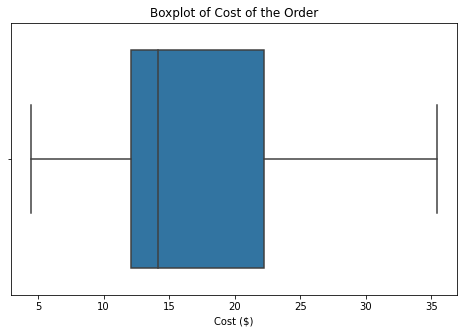

<Figure size 432x288 with 0 Axes>

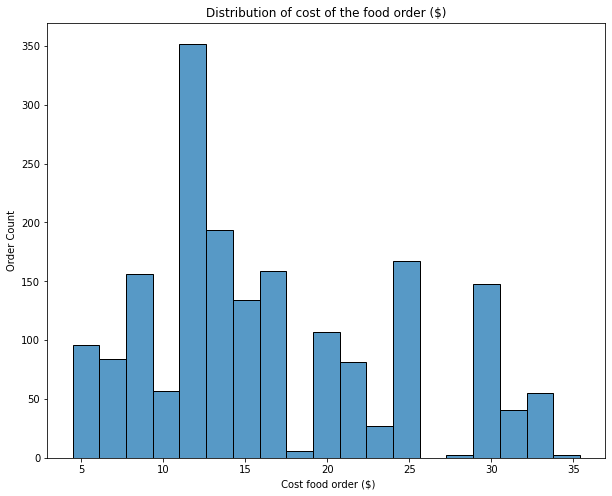

<Figure size 432x288 with 0 Axes>

In [39]:
#Boxplot for cost of order
plt.figure(figsize=(8,5))
sns.boxplot(data=dataset_obs, x='cost_of_the_order')
plt.xlabel('Cost ($)')
plt.title('Boxplot of Cost of the Order')
plt.savefig('Fig4.png')  #Save the plot in png format 
plt.show()
plt.clf()


# Histogram for cost of order
plt.figure(figsize=(10,8))
sns.histplot(dataset_obs.cost_of_the_order)
plt.xlabel(' Cost food order ($)')
plt.ylabel('Order Count')
plt.title('Distribution of cost of the food order ($)')  #Enclose the title in the plot

plt.savefig('Fig5.png')   #Save the figure in png format 
plt.show()
plt.clf()

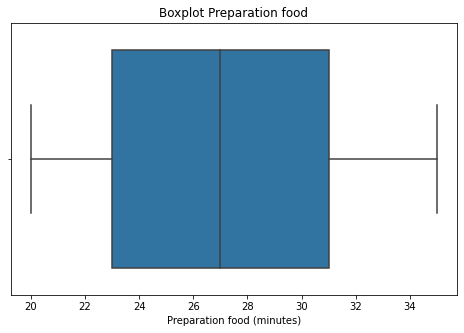

<Figure size 432x288 with 0 Axes>

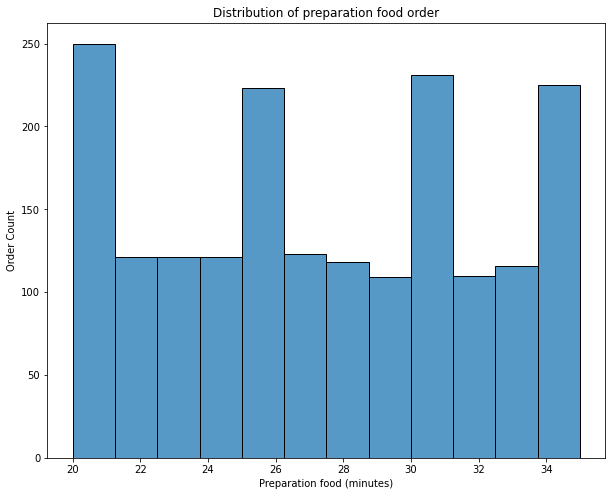

<Figure size 432x288 with 0 Axes>

In [40]:
#Boxplot for food preparation time 
plt.figure(figsize=(8,5))
sns.boxplot(data=dataset_obs, x='food_preparation_time')
plt.xlabel('Preparation food (minutes)')
plt.title('Boxplot Preparation food')
plt.savefig('Fig6.png') #Save the plot in png format 
plt.show()
plt.clf()

# Histogram for cost of order
plt.figure(figsize=(10,8))
sns.histplot(dataset_obs.food_preparation_time)
plt.xlabel('Preparation food (minutes)')
plt.ylabel('Order Count')
plt.title('Distribution of preparation food order')  #Enclose the title in the plot

plt.savefig('Fig7.png')   #Save the figure in png format 
plt.show()
plt.clf()

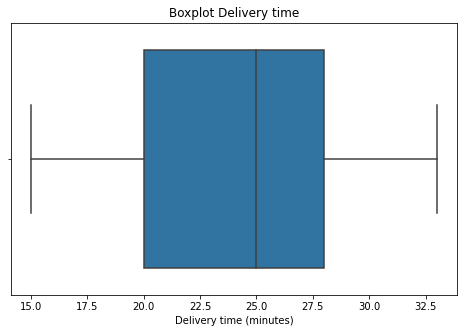

<Figure size 432x288 with 0 Axes>

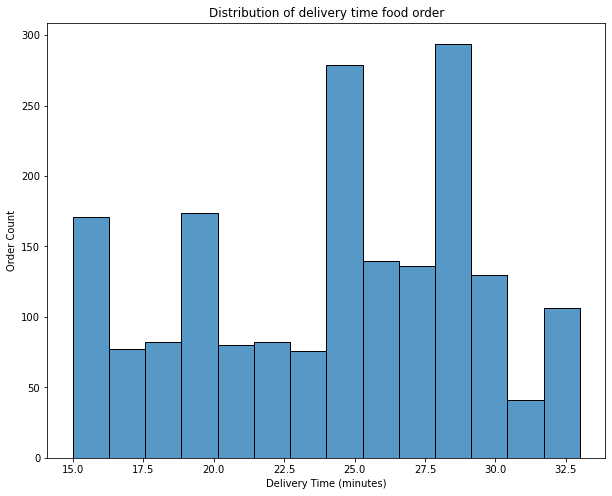

<Figure size 432x288 with 0 Axes>

In [41]:
#Boxplot for delivery_time 
plt.figure(figsize=(8,5))
sns.boxplot(data=dataset_obs, x='delivery_time')
plt.xlabel('Delivery time (minutes)')
plt.title('Boxplot Delivery time')
plt.savefig('Fig8.png') #Save the plot in png format 
plt.show()
plt.clf()

# Histogram for delivery_time 
plt.figure(figsize=(10,8))
sns.histplot(dataset_obs.delivery_time)
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Order Count')
plt.title('Distribution of delivery time food order')  #Enclose the title in the plot

plt.savefig('Fig9.png')   #Save the figure in png format 
plt.show()
plt.clf()

VISUALISAZION OF CATEGORICAL AND NUMERICAL VARIABLES / BIVARIATE ANALYSIS

Visualisation of the most 5 top restaurants

In [42]:
# Displaying the top 5 restaurants
dataset_obs['restaurant_name'].value_counts().iloc[0:5]

Shake Shack                  219
Blue Ribbon Sushi            192
The Meatball Shop            132
Blue Ribbon Fried Chicken     96
Sushi of Gari                 77
Name: restaurant_name, dtype: int64

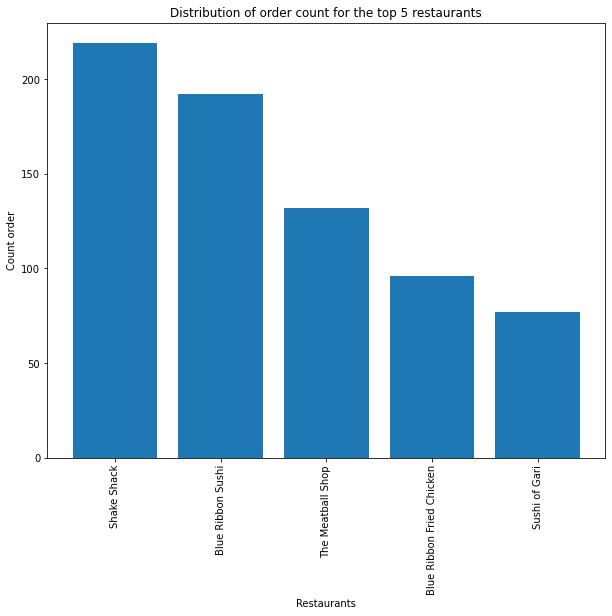

<Figure size 432x288 with 0 Axes>

In [43]:
#Barplot of the countcategory of the 5 top restaurants
plt.figure(figsize=(10,8))
name_restaurant = ['Shake Shack', 'Blue Ribbon Sushi', 'The Meatball Shop', 'Blue Ribbon Fried Chicken', 'Sushi of Gari']
num_obs_restaurant = [219, 192, 132, 96, 77]
    
plt.bar(range(len(name_restaurant)), num_obs_restaurant) # Make the bars plot 

# Add title and label to  the x and y-axis 
plt.xticks(rotation=90)
plt.title('Distribution of order count for the top 5 restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Count order')
ax = plt.subplot()
ax.set_xticks(range(5))
ax.set_xticklabels(name_restaurant)

plt.savefig('Fig10.png') #Save the plot in png format 
plt.show()
plt.clf()

Visualisation of the most popular cuisine category on weekends and weekday

In [44]:
dataset_obs[dataset_obs.day_of_the_week == 'Weekend'].sort_values(by=['cuisine_type']).groupby("cuisine_type").size()

cuisine_type
American          410
Chinese           162
French             13
Indian             49
Italian           195
Japanese          334
Korean              9
Mediterranean      32
Mexican            52
Middle Eastern     32
Southern           11
Spanish            11
Thai               11
Vietnamese          4
dtype: int64

In [45]:
dataset_obs[dataset_obs.day_of_the_week == 'Weekday'].sort_values(by=['cuisine_type']).groupby("cuisine_type").size()

cuisine_type
American          169
Chinese            51
French              5
Indian             24
Italian            89
Japanese          135
Korean              2
Mediterranean      14
Mexican            24
Middle Eastern     17
Southern            6
Spanish             1
Thai                3
Vietnamese          3
dtype: int64

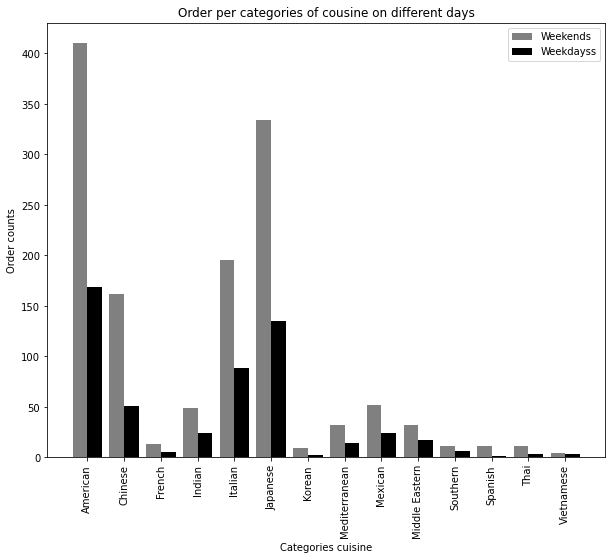

In [46]:
# Plot distribution of order per restaurants during weekend and weekday
name_cuisine = ['American', 'Chinese', 'French', 'Indian', 'Italian', 'Japanese', 'Korean', 'Mediterranean', 'Mexican',
                'Middle Eastern', 'Southern', 'Spanish', 'Thai', 'Vietnamese']
weekend_c = [410, 162, 13, 49, 195, 334, 9, 32, 52, 32, 11, 11, 11, 4]
weekday_c = [169, 51, 5, 24, 89, 135, 2, 14, 24, 17, 6, 1, 3, 3]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

#Making the first required plot 
n=1
t=2
d=14
w=0.8
weekend_c_x = [t*x + w*n for x in range(d)]

# Making the second plot
n=2
t=2
d=14
w=0.8
weekday_c_x = [t*x + w*n for x in range(d)]

plt.figure(figsize=(10,8))  #Make figure with the required dimensions

ax= plt.subplot() #Set up the set of axes

# Make the bars plot 
plt.bar(weekend_c_x, weekend_c, color='grey')
plt.bar(weekday_c_x, weekday_c, color='black')

# Refine and label the x-axis 
middle_x = [(a+b) / 2.0 for a,b in zip(weekend_c_x, weekday_c_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(name_cuisine, rotation=45)

# Enclose a legend to the plot 
legend_labels = ['Weekends', 'Weekdayss']
plt.legend(legend_labels, loc=1)

# Add title and label to  the x and y-axis 
plt.title('Order per categories of cousine on different days')
plt.xlabel('Categories cuisine')
plt.xticks(rotation=90)
plt.ylabel('Order counts')

plt.savefig('Fig11.png')  #Save the plot in png format 
plt.show()


The plot shows that the highest percentages of orders of American, Japanes, the Italian and Chinese cuisines are located mainly in the weekend than in the weekday. 

In [47]:
dataset_obs.sort_values(by=['cuisine_type']).groupby("cuisine_type").describe()

order_id                                                   \
                  count          mean         std        min         25%   
cuisine_type                                                               
American          579.0  1.477489e+06  549.131617  1476547.0  1477011.50   
Chinese           213.0  1.477526e+06  545.152227  1476588.0  1477067.00   
French             18.0  1.477438e+06  529.935130  1476754.0  1476929.50   
Indian             73.0  1.477493e+06  563.977503  1476549.0  1477080.00   
Italian           284.0  1.477532e+06  550.398627  1476553.0  1477045.50   
Japanese          469.0  1.477485e+06  551.741071  1476548.0  1476997.00   
Korean             11.0  1.477436e+06  559.429677  1476790.0  1476910.00   
Mediterranean      46.0  1.477483e+06  538.210687  1476562.0  1477035.50   
Mexican            76.0  1.477446e+06  556.568863  1476582.0  1477031.25   
Middle Eastern     49.0  1.477412e+06  584.325785  1476556.0  1476834.00   
Southern           17.0  1.477533e+06  506.678094  1476657.0  1477113.00   
Spanish            12.0  1.477497e+06  491.344376  1476739.0  1477274.25   
Thai               14.0  1.477584e+06  516.697421  1476717.0  1477230.00   
Vietnamese          7.0  1.477389e+06  553.152308  1476837.0  1476985.50   

                                                 customer_id                 \
                      50%         75%        max       count           mean   
cuisine_type                                                                  
American        1477466.0  1477980.00  1478444.0       579.0  183512.281520   
Chinese         1477523.0  1477973.00  1478441.0       213.0  181173.436620   
French          1477551.0  1477794.75  1478349.0        18.0  158138.722222   
Indian          1477530.0  1477938.00  1478436.0        73.0  162106.397260   
Italian         1477547.5  1478002.25  1478425.0       284.0  159247.883803   
Japanese        1477488.0  1477987.00  1478440.0       469.0  161620.899787   
Korean          1477307.0  1477865.50  1478363.0        11.0  205667.090909   
Mediterranean   1477474.0  1477944.00  1478427.0        46.0  115908.130435   
Mexican         1477408.5  1477897.00  1478437.0        76.0  179893.684211   
Middle Eastern  1477315.0  1477879.00  1478443.0        49.0  168839.938776   
Southern        1477570.0  1477946.00  1478384.0        17.0  140340.117647   
Spanish         1477442.5  1477847.25  1478375.0        12.0  180333.500000   
Thai            1477537.0  1477903.00  1478391.0        14.0  211472.571429   
Vietnamese      1477189.0  1477677.00  1478373.0         7.0  208296.142857   

                ... delivery_time       rating_new                           \
                ...           75%   max      count      mean       std  min   
cuisine_type    ...                                                           
American        ...         28.00  33.0      579.0  4.285867  0.616549  3.0   
Chinese         ...         28.00  33.0      213.0  4.355247  0.624646  3.0   
French          ...         28.75  29.0       18.0  4.277778  0.601197  3.0   
Indian          ...         29.00  32.0       73.0  4.561644  0.577742  3.0   
Italian         ...         29.00  33.0      284.0  4.361662  0.609592  3.0   
Japanese        ...         28.00  33.0      469.0  4.377249  0.566780  3.0   
Korean          ...         26.00  26.0       11.0  4.100000  0.741620  3.0   
Mediterranean   ...         28.75  33.0       46.0  4.220538  0.734825  3.0   
Mexican         ...         28.00  33.0       76.0  4.451276  0.607278  3.0   
Middle Eastern  ...         29.00  33.0       49.0  4.235479  0.629478  3.0   
Southern        ...         28.00  33.0       17.0  4.299465  0.551823  3.0   
Spanish         ...         28.25  30.0       12.0  4.812500  0.284545  4.0   
Thai            ...         26.75  29.0       14.0  4.690476  0.461589  4.0   
Vietnamese      ...         28.50  31.0        7.0  4.142857  0.899735  3.0   

                                  

Let's a more detailed overview of the descriptive statistics for different categories of cuisine

In [48]:
#Descriptive statistics per different categories of cousine
# Values of cost_of_the_order, food_preparation_time, delivery_time per different categories of cousine

dataset_obs.set_index('cuisine_type', inplace=True)
#American 
print(dataset_obs.loc[['American']]) 
print(dataset_obs.loc[['American']].describe()) # Descriptive statistics per American cuisine

#Chinese
print(dataset_obs.loc[['Chinese']]) 
print(dataset_obs.loc[['Chinese']].describe()) # Descriptive statistics per Chinese cuisine

#French
print(dataset_obs.loc[['French']])
print(dataset_obs.loc[['French']].describe()) # Descriptive statistics per French cuisine

#Indian
print(dataset_obs.loc[['Indian']]) 
print(dataset_obs.loc[['Indian']].describe()) # Descriptive statistics per Indian cuisine

#Italian
print(dataset_obs.loc[['Italian']]) 
print(dataset_obs.loc[['Italian']].describe()) # Descriptive statistics per Italian cuisine

#Japanese
print(dataset_obs.loc[['Japanese']]) 
print(dataset_obs.loc[['Japanese']].describe()) # Descriptive statistics per Japanese cuisine

#Korean
print(dataset_obs.loc[['Korean']]) 
print(dataset_obs.loc[['Korean']].describe()) # Descriptive statistics per Korean cuisine

#Mediterranean
print(dataset_obs.loc[['Mediterranean']]) 
print(dataset_obs.loc[['Mediterranean']].describe()) # Descriptive statistics per Mediterranean cuisine

#Mexican
print(dataset_obs.loc[['Mexican']]) 
print(dataset_obs.loc[['Mexican']].describe()) # Descriptive statistics per Mexican cuisine                
    
#Middle Eastern
print(dataset_obs.loc[['Middle Eastern']])
print(dataset_obs.loc[['Middle Eastern']].describe()) # Descriptive statistics per Middle Easterncuisine        

#Southern
print(dataset_obs.loc[['Southern']]) 
print(dataset_obs.loc[['Southern']].describe()) # Descriptive statistics per Southerncuisine        

#Spanish
print(dataset_obs.loc[['Spanish']]) 
print(dataset_obs.loc[['Spanish']].describe()) # Descriptive statistics per Spanish cuisine        

#Thai
print(dataset_obs.loc[['Thai']])
print(dataset_obs.loc[['Thai']].describe()) # Descriptive statistics per Thai cuisine        

#Vietnamese
print(dataset_obs.loc[['Vietnamese']]) 
print(dataset_obs.loc[['Vietnamese']].describe()) # Descriptive statistics per Vietnamese cuisine        


              order_id  customer_id            restaurant_name  \
cuisine_type                                                     
American       1477334       106968  Blue Ribbon Fried Chicken   
American       1478249        76942           Dirty Bird to Go   
American       1476966       129969  Blue Ribbon Fried Chicken   
American       1478198        62667     Lucky's Famous Burgers   
American       1477414        66222                Shake Shack   
...                ...          ...                        ...   
American       1477550        97324                Shake Shack   
American       1478277        48282          The Meatball Shop   
American       1476873       237616                Shake Shack   
American       1476981       138586                Shake Shack   
American       1477421       397537                  The Smile   

              cost_of_the_order day_of_the_week     rating  \
cuisine_type                                                 
American         

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  4.600000e+01      46.000000          46.000000              46.000000   
mean   1.477483e+06  115908.130435          15.474783              27.000000   
std    5.382107e+02   88377.930224           7.604720               4.908043   
min    1.476562e+06   39011.000000           5.670000              20.000000   
25%    1.477036e+06   61244.500000          12.092500              23.000000   
50%    1.477474e+06   78401.000000          13.995000              27.000000   
75%    1.477944e+06  129486.000000          18.782500              31.000000   
max    1.478427e+06  354719.000000          35.410000              35.000000   

       delivery_time  rating_new  
count      46.000000   46.000000  
mean       23.586957    4.220538  
std         5.422489    0.734825  
min        15.000000    3.000000  
25%        19.000000    4.000000  
50%        24.000000    4.315789  
75%        28.750000    5.000000  

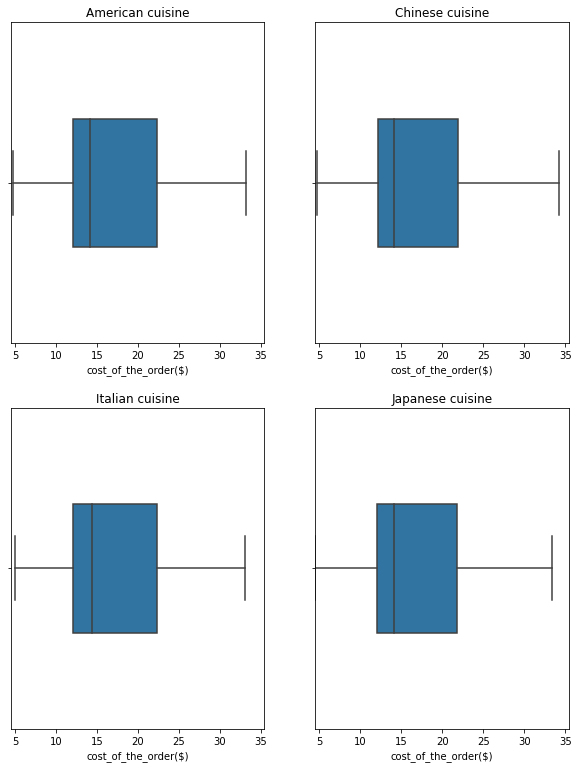

<Figure size 432x288 with 0 Axes>

In [49]:
# Box plot of the cost of food  by most four popular cuisine categories 
plt.figure(figsize=(10,13)) 
# Objective : plt.subplot(2,2,4) #Creation of a figure with four subplots, split into 2 rows and 2 columns 
#1st subplot_ American cuisine
plt.subplot(2,2,1)
sns.boxplot(x='cost_of_the_order', data=dataset_obs.loc[['American']])
plt.axis([4.470000, 35.410000, -1, 1]) 
plt.xlabel('cost_of_the_order($)')
plt.title('American cuisine')
#2nd subplot _Chinese cuisine
plt.subplot(2,2,2)
sns.boxplot(x='cost_of_the_order', data=dataset_obs.loc[['Chinese']])
plt.axis([4.470000, 35.410000, -1, 1]) 
plt.xlabel('cost_of_the_order($)')
plt.title('Chinese cuisine')
#3th subplot _Italian cuisine
plt.subplot(2,2,3)
sns.boxplot(x='cost_of_the_order', data=dataset_obs.loc[['Italian']])
plt.axis([4.470000, 35.410000, -1, 1]) 
plt.xlabel('cost_of_the_order($)')
plt.title('Italian cuisine')
#4th subplot_Japanese
plt.subplot(2,2,4)
sns.boxplot(x='cost_of_the_order', data=dataset_obs.loc[['Japanese']]) 
plt.axis([4.470000, 35.410000, -1, 1]) 
plt.xlabel('cost_of_the_order($)')
plt.title('Japanese cuisine')
plt.savefig('Fig12.png')
plt.show()
plt.clf()

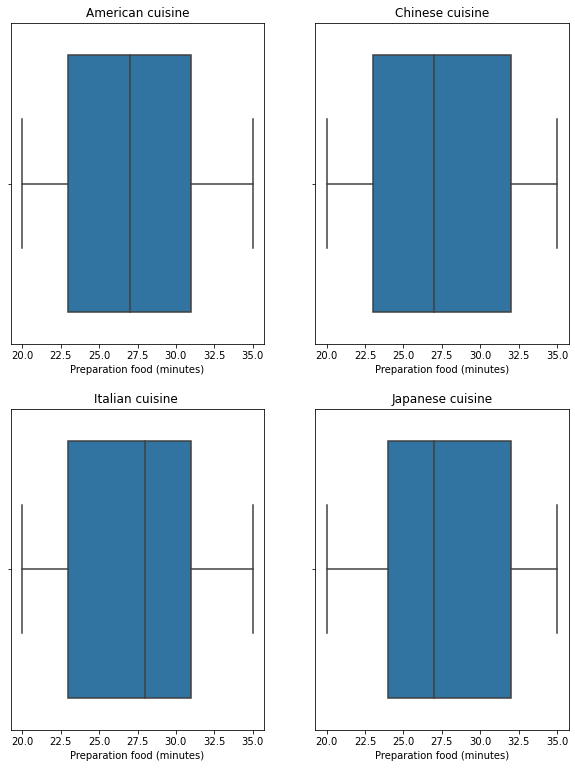

<Figure size 432x288 with 0 Axes>

In [50]:
# Box plot of the time preparation food by most four popular cuisine categories 
plt.figure(figsize=(10,13)) 
# Objective : plt.subplot(2,2,4) #Creation of a figure with four subplots, split into 2 rows and 2 columns 
#1st subplot_ American cuisine
plt.subplot(2,2,1)
sns.boxplot(x='food_preparation_time', data=dataset_obs.loc[['American']])
#plt.axis([35.410000, 4.470000, -1, 1]) 
plt.xlabel('Preparation food (minutes)')
plt.title('American cuisine')
#2nd subplot _Chinese cuisine
plt.subplot(2,2,2)
sns.boxplot(x='food_preparation_time', data=dataset_obs.loc[['Chinese']])
#plt.axis([35.410000, 4.470000, -1, 1]) 
plt.xlabel('Preparation food (minutes)')
plt.title('Chinese cuisine')
#3th subplot_Italian cuisine 
plt.subplot(2,2,3)
sns.boxplot(x='food_preparation_time', data=dataset_obs.loc[['Italian']])
#plt.axis([35.410000, 4.470000, -1, 1]) 
plt.xlabel('Preparation food (minutes)')
plt.title('Italian cuisine ')
#4th subplot_Japanese
plt.subplot(2,2,4)
sns.boxplot(x='food_preparation_time', data=dataset_obs.loc[['Japanese']])
#plt.axis([35.410000, 4.470000, -1, 1]) 
plt.xlabel('Preparation food (minutes)')
plt.title('Japanese cuisine')
plt.savefig('Fig13.png')
plt.show()
plt.clf()

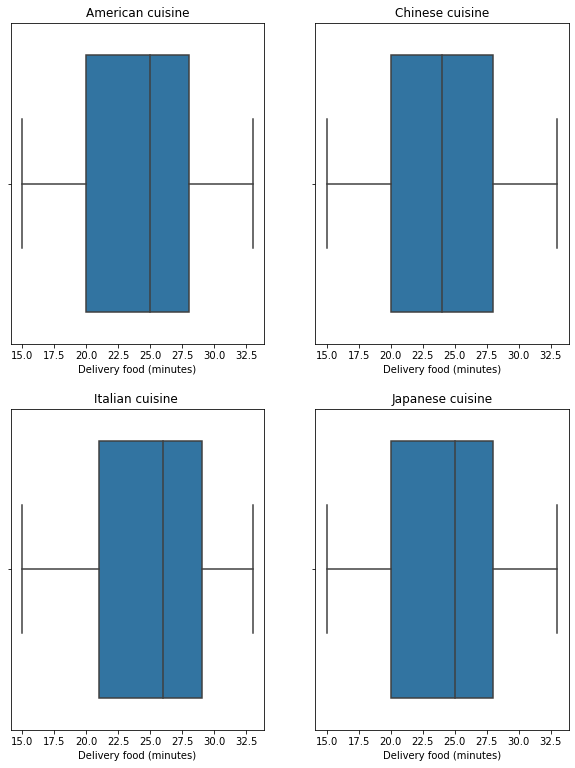

<Figure size 432x288 with 0 Axes>

In [51]:
# Box plot of the delivery food by most four popular cuisine categories 
plt.figure(figsize=(10,13)) 
# Objective : plt.subplot(2,2,4) #Creation of a figure with four subplots, split into 2 rows and 2 columns 
#1st subplot_ American cuisine
plt.subplot(2,2,1)
sns.boxplot(x='delivery_time', data=dataset_obs.loc[['American']])
#plt.axis([35.410000, 4.470000, -1, 1]) 
plt.xlabel('Delivery food (minutes)')
plt.title('American cuisine')
#2nd subplot _Chinese cuisine
plt.subplot(2,2,2)
sns.boxplot(x='delivery_time', data=dataset_obs.loc[['Chinese']])
#plt.axis([35.410000, 4.470000, -1, 1]) 
plt.xlabel('Delivery food (minutes)')
plt.title('Chinese cuisine')
#3th subplot_Italian cuisine 
plt.subplot(2,2,3)
sns.boxplot(x='delivery_time', data=dataset_obs.loc[['Italian']])
#plt.axis([35.410000, 4.470000, -1, 1]) 
plt.xlabel('Delivery food (minutes)')
plt.title('Italian cuisine ')
#4th subplot_Japanese
plt.subplot(2,2,4)
sns.boxplot(x='delivery_time', data=dataset_obs.loc[['Japanese']])
#plt.axis([35.410000, 4.470000, -1, 1]) 
plt.xlabel('Delivery food (minutes)')
plt.title('Japanese cuisine')
plt.savefig('Fig14.png')
plt.show()
plt.clf()

Cost (Price) of food  by per weekend and weekdays 

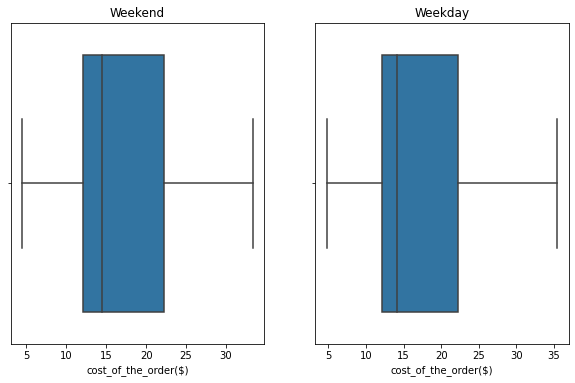

<Figure size 432x288 with 0 Axes>

In [52]:
# Box plot of the cost of food  by per weekend and weekdays 
plt.figure(figsize=(10,13)) 
# Objective : plt.subplot(1,2,2) #Creation of a figure with two subplots, split into 2 rows and 1columns 
#1st subplot_ weekend
plt.subplot(2,2,1)
sns.boxplot(x='cost_of_the_order', data=dataset_obs.loc[dataset_obs["day_of_the_week"] == 'Weekend'])
#plt.axis([4.470000, 35.410000, -1, 1]) 
plt.xlabel('cost_of_the_order($)')
plt.title('Weekend')
#2nd subplot _weekday
plt.subplot(2,2,2)
sns.boxplot(x='cost_of_the_order', data=dataset_obs.loc[dataset_obs["day_of_the_week"] == 'Weekday'])
#plt.axis([4.470000, 35.410000, -1, 1]) 
plt.xlabel('cost_of_the_order($)')
plt.title('Weekday')

plt.savefig('Fig15.png')
plt.show()
plt.clf()

Inspection correlation between cost_of_the_order, food_preparation_time and delivery time

In [53]:
#Is there a correlation between cost_of_the_order and food_preparation_time?
print(dataset_obs['cost_of_the_order'].corr(dataset_obs['food_preparation_time'])) #x.corr(y)
print(dataset_obs['food_preparation_time'].corr(dataset_obs['cost_of_the_order'])) #y.corr(x)
print(dataset_obs['cost_of_the_order'].corr(dataset_obs['food_preparation_time'], method='spearman')) #x.corr(y, method='spearman') 

0.04385291390403549
0.04385291390403549
0.051792245659854574


The output shows that there is no so significant correlation between price of the order and preparation of the order. 

In [54]:
#Is there a correlation between cost_of_the_order and delivery_time?
print(dataset_obs['cost_of_the_order'].corr(dataset_obs['delivery_time'])) #x.corr(y)
print(dataset_obs['delivery_time'].corr(dataset_obs['cost_of_the_order'])) #y.corr(x)
print(dataset_obs['cost_of_the_order'].corr(dataset_obs['delivery_time'], method='spearman')) #x.corr(y, method='spearman') 

-0.03308716265712461
-0.03308716265712461
-0.029631497891280636


The output shows that there is no so significant correlation between price of the order and time delivery of the order. 

# References

[REF1] https://en.wikipedia.org/wiki/Foodhub
[REF2] https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset
    